<a href="https://colab.research.google.com/github/asuzukosi/GraphNeuralNetworksAndKnowledgGraphs/blob/main/OBD_DataAnalysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Onboard Diagnositics data analytics project

This project comprises of analysis of 14 drivers driving on their daily routes. The data is gathered from the power train module and also contains meta data about the vehicles.

We perform Univariate and Bi-variate data analysis to gather insight from the data.

## Install required libraries
For the data analysis, we will be making use of numpy, pandas, matlotlib and seaborn for analysis and visualization.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Extract data from xlsx files
We will be extracting the OBD-DatasetII to use oin our analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/advanced data science assessment/OBD-DATA.xlsx')
data.head()

,TIMESTAMP,MAKE,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,1502902504267,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.569,0.01,13.0,16.0,2.0,8.0,2017.0
1,1502902512283,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.565,0.01,13.0,16.0,2.0,8.0,2017.0
2,1502902520291,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.573,0.01,13.0,16.0,2.0,8.0,2017.0
3,1502902528300,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.565,0.01,13.0,16.0,2.0,8.0,2017.0
4,1502902536320,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.569,0.01,13.0,16.0,2.0,8.0,2017.0


## Extract Trouble codes
We want to count the fraction of data instances with recorded trouble instances

In [4]:
data[data['TROUBLE_CODES'].notnull()].shape,data.shape

((11925, 33), (47514, 33))

In [6]:
(11925 * 100) / 47514. # 25% of the data has reported trouble codes

25.0978658921581

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47514 entries, 0 to 47513
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47514 non-null  int64  
 1   MAKE                         47459 non-null  object 
 2   MODEL                        47459 non-null  object 
 3   CAR_YEAR                     47459 non-null  float64
 4   ENGINE_POWER                 47459 non-null  float64
 5   AUTOMATIC                    47459 non-null  object 
 6   VEHICLE_ID                   47514 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     10212 non-null  float64
 8   ENGINE_COOLANT_TEMP          33964 non-null  float64
 9   FUEL_LEVEL                   2994 non-null   float64
 10  ENGINE_LOAD                  30972 non-null  float64
 11  AMBIENT_AIR_TEMP             3619 non-null   float64
 12  ENGINE_RPM                   33859 non-null  float64
 13  INTAKE_MANIFOLD_

In [8]:
data['TROUBLE_CODES'].unique() # extract names of unique trouble codes

array([nan, 'P0133', 'C0300', 'P0079P2004P3000', 'P0078U1004P3000',
       'P0079C1004P3000', 'P007EP2036P18F0', 'P007EP2036P18D0',
       'P007FP2036P18D0', 'P0079P1004P3000', 'P007EP2036P18E0',
       'P007FP2036P18E0', 'P0078B0004P3000', 'P007FP2036P18F0'],
      dtype=object)

## Drop dtaa points without Trouble codes
Since we wish to analyse the data which have trouble codes, we can drop the rest of the data

In [9]:
data = data.dropna(subset = ['TROUBLE_CODES']).reset_index(drop=True) # getting rid of null values from trouble codes
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], unit='ms') # converting Timestamp to proper format.

In [10]:
data.loc[(data['TROUBLE_CODES'].str.contains('P007E')) | (data['TROUBLE_CODES'].str.contains('P007F'))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 11751 to 11924
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TIMESTAMP                    58 non-null     datetime64[ns]
 1   MAKE                         58 non-null     object        
 2   MODEL                        58 non-null     object        
 3   CAR_YEAR                     58 non-null     float64       
 4   ENGINE_POWER                 58 non-null     float64       
 5   AUTOMATIC                    58 non-null     object        
 6   VEHICLE_ID                   58 non-null     object        
 7   BAROMETRIC_PRESSURE(KPA)     0 non-null      float64       
 8   ENGINE_COOLANT_TEMP          54 non-null     float64       
 9   FUEL_LEVEL                   0 non-null      float64       
 10  ENGINE_LOAD                  58 non-null     float64       
 11  AMBIENT_AIR_TEMP             0 non-null 

In [11]:
# check for data instances which have a trouble
data.loc[(data['TROUBLE_CODES'].str.contains('P007E')) | (data['TROUBLE_CODES'].str.contains('P007F'))]

,TIMESTAMP,MAKE,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
11751,2017-08-30 11:04:27.390,citroen,c3,2013.0,1.4,n,car13,NaN,93.0,NaN,...,0.149,MIL is OFF0 codes,P007EP2036P18F0,0.494,NaN,46.0,10.0,2.0,8.0,2017.0
11752,2017-08-30 16:21:20.839,citroen,c3,2013.0,1.4,n,car13,NaN,71.0,NaN,...,0.157,MIL is OFF0 codes,P007EP2036P18D0,0.486,NaN,20.0,16.0,2.0,8.0,2017.0
11753,2017-08-30 16:21:32.853,citroen,c3,2013.0,1.4,n,car13,NaN,73.0,NaN,...,0.157,MIL is OFF0 codes,P007EP2036P18D0,0.545,NaN,20.0,16.0,2.0,8.0,2017.0
11754,2017-08-30 16:21:48.159,citroen,c3,2013.0,1.4,n,car13,NaN,NaN,NaN,...,0.208,MIL is OFF0 codes,P007FP2036P18D0,0.576,NaN,20.0,16.0,2.0,8.0,2017.0
11756,2017-08-30 16:22:04.906,citroen,c3,2013.0,1.4,n,car13,NaN,79.0,NaN,...,0.192,MIL is OFF0 codes,P007EP2036P18E0,0.522,NaN,20.0,16.0,2.0,8.0,2017.0
11757,2017-08-30 16:22:16.938,citroen,c3,2013.0,1.4,n,car13,NaN,81.0,NaN,...,0.169,MIL is OFF0 codes,P007FP2036P18E0,0.443,NaN,20.0,16.0,2.0,8.0,2017.0
11759,2017-08-30 16:22:28.956,citroen,c3,2013.0,1.4,n,car13,NaN,83.0,NaN,...,0.173,MIL is OFF0 codes,P007EP2036P18E0,0.412,NaN,20.0,16.0,2.0,8.0,2017.0
11761,2017-08-30 16:23:05.000,citroen,c3,2013.0,1.4,n,car13,NaN,88.0,NaN,...,0.161,MIL is OFF0 codes,P007EP2036P18E0,NaN,NaN,20.0,16.0,2.0,8.0,2017.0
11762,2017-08-30 16:23:17.005,citroen,c3,2013.0,1.4,n,car13,NaN,90.0,NaN,...,0.157,MIL is OFF0 codes,P007FP2036P18E0,0.576,NaN,20.0,16.0,2.0,8.0,2017.0
11763,2017-08-30 16:23:29.026,citroen,c3,2013.0,1.4,n,car13,NaN,91.0,NaN,...,0.157,MIL is OFF0 codes,P007EP2036P18E0,0.506,NaN,20.0,16.0,2.0,8.0,2017.0


In [12]:
data.loc[(data['TROUBLE_CODES'].str.contains('P007E')) | (data['TROUBLE_CODES'].str.contains('P007F'))].nunique()
# checking data of interest for unique & constant values
# we could see some of the columns like MAKE, MODEL, DTC_NUMBER having only single value for all the timestamps.

TIMESTAMP                      58
MAKE                            1
MODEL                           1
CAR_YEAR                        1
ENGINE_POWER                    1
AUTOMATIC                       1
VEHICLE_ID                      1
BAROMETRIC_PRESSURE(KPA)        0
ENGINE_COOLANT_TEMP            21
FUEL_LEVEL                      0
ENGINE_LOAD                    46
AMBIENT_AIR_TEMP                0
ENGINE_RPM                     56
INTAKE_MANIFOLD_PRESSURE       33
MAF                             0
LONG TERM FUEL TRIM BANK 2      0
FUEL_TYPE                       0
AIR_INTAKE_TEMP                20
FUEL_PRESSURE                   0
SPEED                          34
SHORT TERM FUEL TRIM BANK 2     0
SHORT TERM FUEL TRIM BANK 1    17
ENGINE_RUNTIME                  0
THROTTLE_POS                   30
DTC_NUMBER                      1
TROUBLE_CODES                   6
TIMING_ADVANCE                 33
EQUIV_RATIO                     0
MIN                             9
HOURS         

## Extract only required data
Filter out the entire dataset and get only the required fields

In [13]:
req_data = data[['TIMESTAMP','TROUBLE_CODES','ENGINE_COOLANT_TEMP','ENGINE_LOAD','ENGINE_RPM','INTAKE_MANIFOLD_PRESSURE','AIR_INTAKE_TEMP','SPEED','SHORT TERM FUEL TRIM BANK 1','THROTTLE_POS','TIMING_ADVANCE']]
# from the data sanity checks we have selected the columns in the dataset which vary with time to play with.
req_data.head()

,TIMESTAMP,TROUBLE_CODES,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,AIR_INTAKE_TEMP,SPEED,SHORT TERM FUEL TRIM BANK 1,THROTTLE_POS,TIMING_ADVANCE
0,2017-07-08 17:54:47.058,P0133,42.0,0.063,1659.0,24.0,30.0,43.0,NaN,0.043,0.714
1,2017-07-08 17:54:59.071,P0133,42.0,0.067,1290.0,26.0,30.0,35.0,NaN,0.043,0.690
2,2017-07-08 17:55:11.089,P0133,43.0,0.075,1002.0,35.0,31.0,12.0,NaN,0.043,0.506
3,2017-07-08 17:55:23.101,P0133,44.0,0.055,872.0,33.0,30.0,0.0,NaN,0.035,0.537
4,2017-07-08 17:55:35.109,P0133,45.0,0.051,856.0,32.0,30.0,0.0,NaN,0.031,0.541


In [ ]:
# plot the correlation between the fields
plt.figure(figsize = (15,5))
sns.heatmap(req_data.iloc[:,1:].corr(),annot=True)
# checking the correlations between the various sensor data - currently pearson correlation alone is taken into picture

### Univariate & Bivariate Analysis

In the dataset, 'TROUBLE_CODES' column is a categorical feature and remaining columns are continuous variables.
There are three big-picture methods to understand if a continuous and categorical are significantly correlated — point biserial correlation, logistic regression, and Kruskal Wallis H Test.
Of the three, logistic regression is chosen to go forward and it helps to find relationship between trouble code's P007E, P007F and the continuous data.
If there is a relationship between the categorical and continuous variable, we should be able to construct an accurate predictor of the categorical variable from the continuous variable using logistic regression. If the resulting classifier has a high degree of fit, is accurate, sensitive, and specific we can conclude the two variables share a relationship and are indeed correlated.

In [14]:
req_data_1 = req_data[req_data.TROUBLE_CODES.str.contains('P007E')].reset_index(drop=True)
req_data_2 = req_data[req_data.TROUBLE_CODES.str.contains('P007F')].reset_index(drop=True)
# data slicing based on Trouble codes

In [15]:
req_data_1 = req_data_1.set_index(req_data_1['TIMESTAMP']).resample('D').mean().reset_index().fillna(0)
req_data_1['TROUBLE_CODES'] = 'P007E'
req_data_2 = req_data_2.set_index(req_data_2['TIMESTAMP']).resample('D').mean().reset_index().fillna(0)
req_data_2['TROUBLE_CODES'] = 'P007F'
# generalizing trouble code column to two groups - P007E & P007F
combined_data_resampled = pd.concat([req_data_1,req_data_2],ignore_index=True,sort=True)

<ipython-input-15-1e73e51d133c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  req_data_1 = req_data_1.set_index(req_data_1['TIMESTAMP']).resample('D').mean().reset_index().fillna(0)
<ipython-input-15-1e73e51d133c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  req_data_2 = req_data_2.set_index(req_data_2['TIMESTAMP']).resample('D').mean().reset_index().fillna(0)


In [16]:
# retaining original data for comparision with the resampled data
data1 = req_data[req_data.TROUBLE_CODES.str.contains('P007E')].reset_index(drop=True)
data2 = req_data[req_data.TROUBLE_CODES.str.contains('P007F')].reset_index(drop=True)
# data slicing based on Trouble codes
combined_data = pd.concat([data1,data2],ignore_index=True,sort=True)

In [25]:
combined_data = combined_data.dropna()

X = combined_data.drop(columns={'TROUBLE_CODES','TIMESTAMP'})
y = combined_data['TROUBLE_CODES']
X_resampled = combined_data_resampled.drop(columns={'TROUBLE_CODES','TIMESTAMP'})
y_resampled = combined_data_resampled['TROUBLE_CODES']

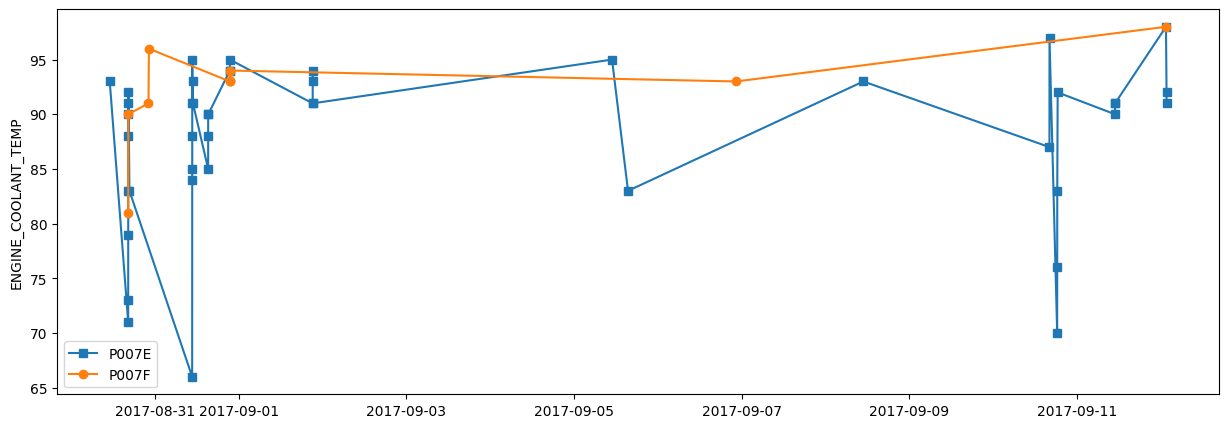

In [26]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['ENGINE_COOLANT_TEMP'], marker = "s", label = 'P007E')
plt.plot(data2['TIMESTAMP'],data2['ENGINE_COOLANT_TEMP'], marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('ENGINE_COOLANT_TEMP')
plt.show()


In [27]:
data1['code'] = 1 # P007E
data2['code'] = 2 # P007F

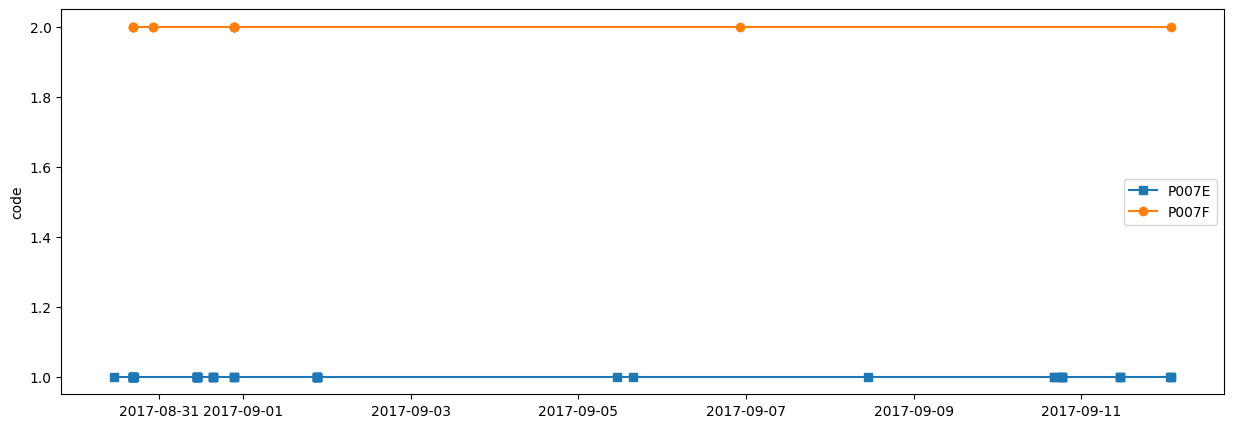

In [28]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['code'], marker = "s", label = 'P007E')
plt.plot(data2['TIMESTAMP'],data2['code'], marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('code')
plt.show()


In [29]:
X = X.dropna()

In [30]:
mdl1 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto').fit(np.array(X['ENGINE_COOLANT_TEMP']).reshape(-1,1) , y)
mdl1.score(np.array(X['ENGINE_COOLANT_TEMP']).reshape(-1,1),y)

# checking the accuracy of the classifier to decide on the relationship between sensor data and trouble code's
# accuracy score is low to set up a relationship

0.34375

In [31]:
mdl1.predict(np.array([114.1]).reshape(-1,1)),mdl1.predict(np.array([114.2]).reshape(-1,1))

(array(['P007EP2036P18F0'], dtype=object),
 array(['P007EP2036P18F0'], dtype=object))

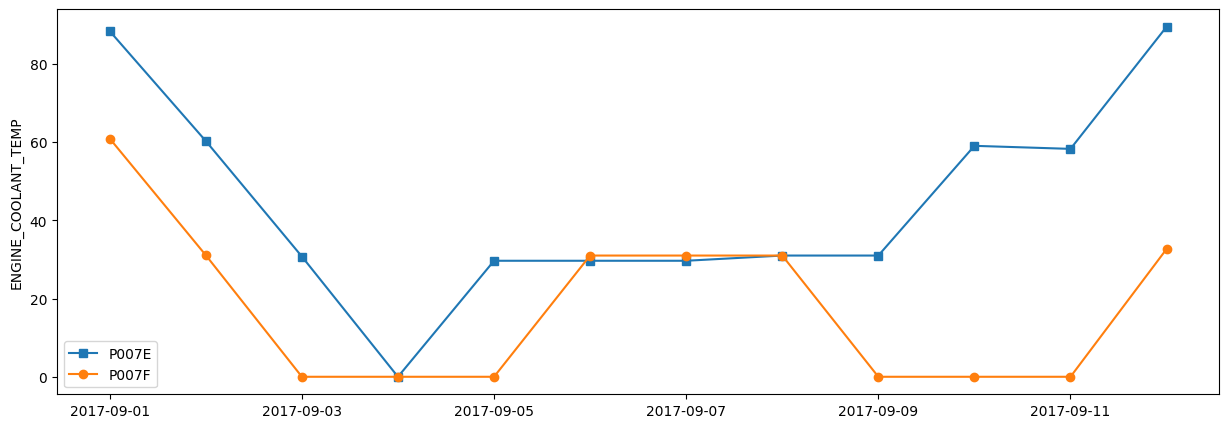

In [32]:
plt.figure(figsize = (15,5))
plt.plot(req_data_1['TIMESTAMP'],req_data_1['ENGINE_COOLANT_TEMP'].rolling(window=3).mean(), marker = "s", label = 'P007E')
plt.plot(req_data_2['TIMESTAMP'],req_data_2['ENGINE_COOLANT_TEMP'].rolling(window=3).mean(), marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('ENGINE_COOLANT_TEMP')
plt.show()
# after downsampling
# P007E - sensor value has a dip from sept 1st to sept 4th, and increases after september 9th.
# P007F - sensor value decreases to 0 until sept 3rd, and follows a seasonal pattern afterwards

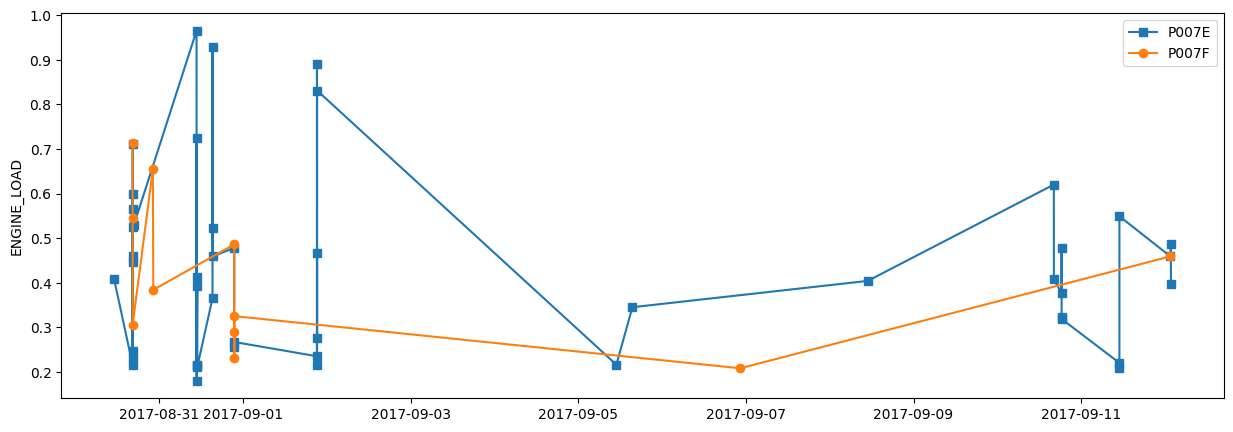

In [33]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['ENGINE_LOAD'], marker = "s", label = 'P007E')
plt.plot(data2['TIMESTAMP'],data2['ENGINE_LOAD'], marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('ENGINE_LOAD')
plt.show()

In [34]:
mdl2 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto').fit(np.array(X['ENGINE_LOAD']).reshape(-1,1) , y)
mdl2.score(np.array(X['ENGINE_LOAD']).reshape(-1,1),y)

# checking the accuracy of the classifier to decide on the relationship between sensor data and trouble code's
# accuracy score is low to set up a relationship

0.4375

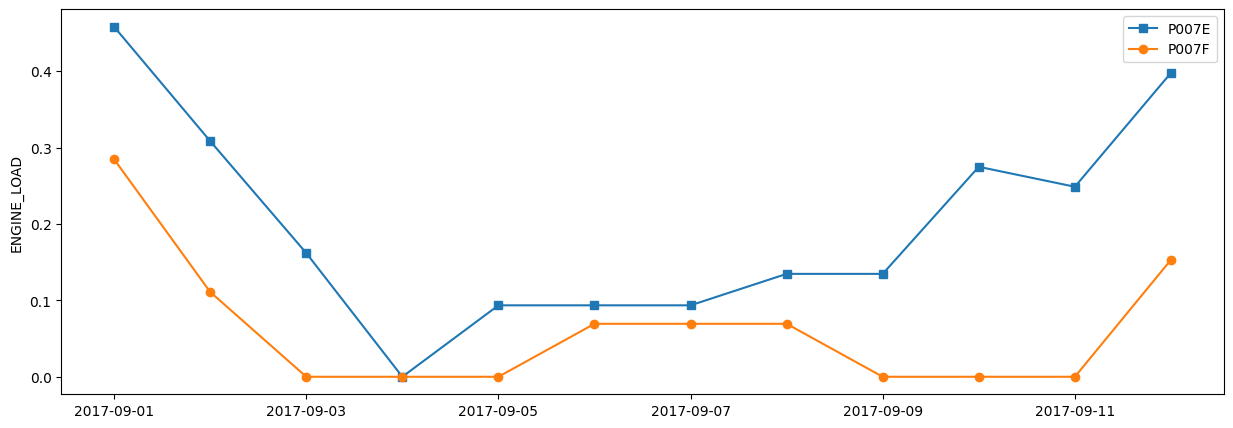

In [35]:
plt.figure(figsize = (15,5))
plt.plot(req_data_1['TIMESTAMP'],req_data_1['ENGINE_LOAD'].rolling(window=3).mean(), marker = "s", label = 'P007E')
plt.plot(req_data_2['TIMESTAMP'],req_data_2['ENGINE_LOAD'].rolling(window=3).mean(), marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('ENGINE_LOAD')
plt.show()
# after downsampling
# P007E - sensor value has a dip from sept 1st to sept 4th, and increases after september 9th.
# P007F - sensor value decreases to 0 until sept 3rd, and follows a seasonal pattern afterwards.


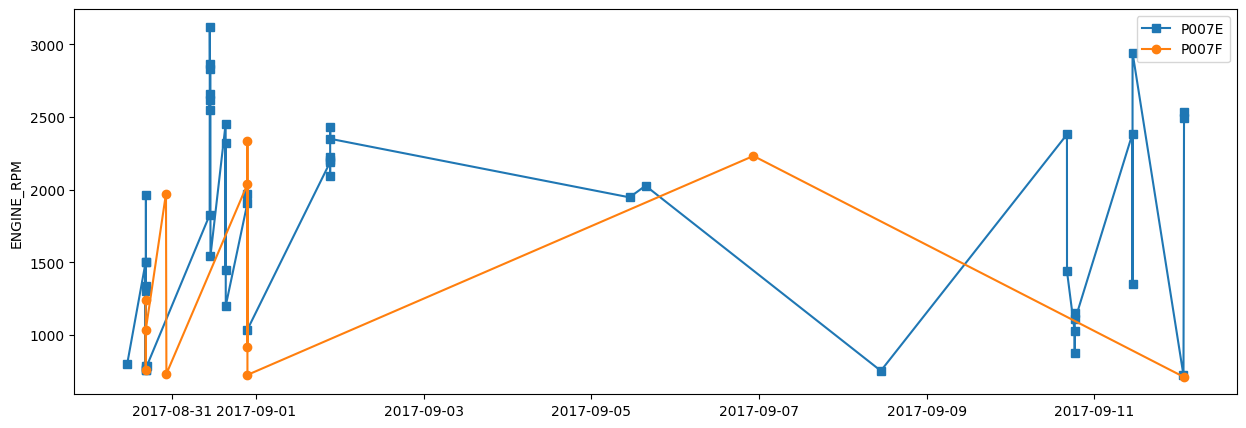

In [36]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['ENGINE_RPM'], marker = "s", label = 'P007E')
plt.plot(data2['TIMESTAMP'],data2['ENGINE_RPM'], marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('ENGINE_RPM')
plt.show()


In [37]:
mdl3 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto').fit(np.array(X['ENGINE_RPM']).reshape(-1,1) , y)
mdl3.score(np.array(X['ENGINE_RPM']).reshape(-1,1),y)

# checking the accuracy of the classifier to decide on the relationship between sensor data and trouble code's
# accuracy score is low to set up a relationship

0.4375

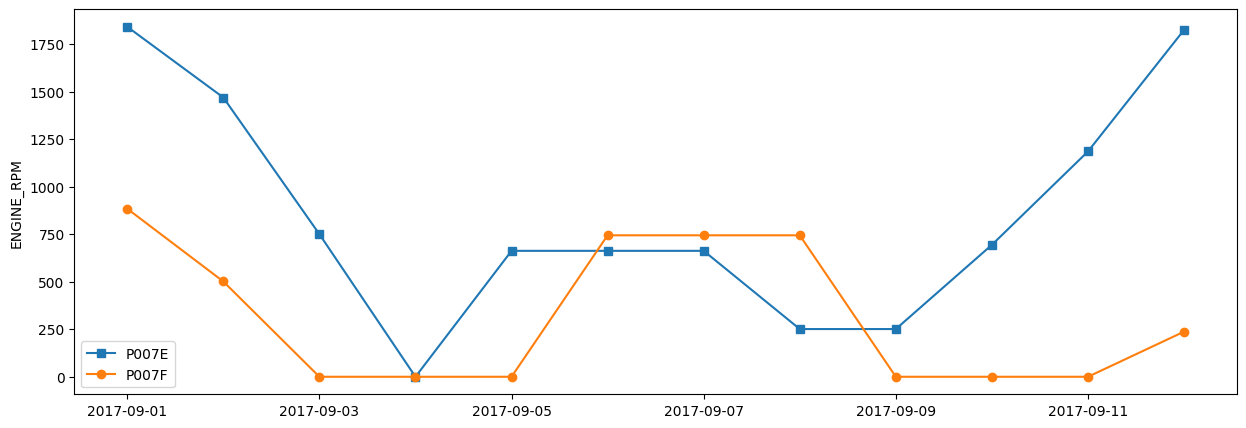

In [38]:
plt.figure(figsize = (15,5))
plt.plot(req_data_1['TIMESTAMP'],req_data_1['ENGINE_RPM'].rolling(window=3).mean(), marker = "s", label = 'P007E')
plt.plot(req_data_2['TIMESTAMP'],req_data_2['ENGINE_RPM'].rolling(window=3).mean(), marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('ENGINE_RPM')
plt.show()
# after downsampling
# P007E - sensor value has a dip from sept 1st to sept 4th, and increases after september 9th.
# P007F - sensor value decreases to 0 until sept 3rd, and follows a seasonal pattern afterwards.

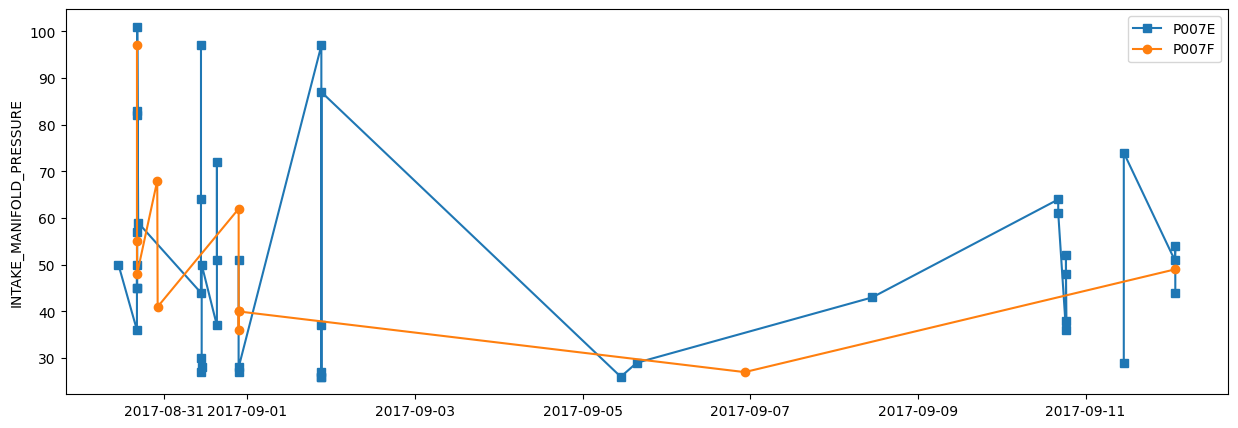

In [39]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['INTAKE_MANIFOLD_PRESSURE'], marker = "s", label = 'P007E')
plt.plot(data2['TIMESTAMP'],data2['INTAKE_MANIFOLD_PRESSURE'], marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('INTAKE_MANIFOLD_PRESSURE')
plt.show()

In [40]:
mdl4 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto',max_iter = 200).fit(np.array(X['INTAKE_MANIFOLD_PRESSURE']).reshape(-1,1) , y)
mdl4.score(np.array(X['INTAKE_MANIFOLD_PRESSURE']).reshape(-1,1),y)

# checking the accuracy of the classifier to decide on the relationship between sensor data and trouble code's
# accuracy score is low to set up a relationship


0.34375

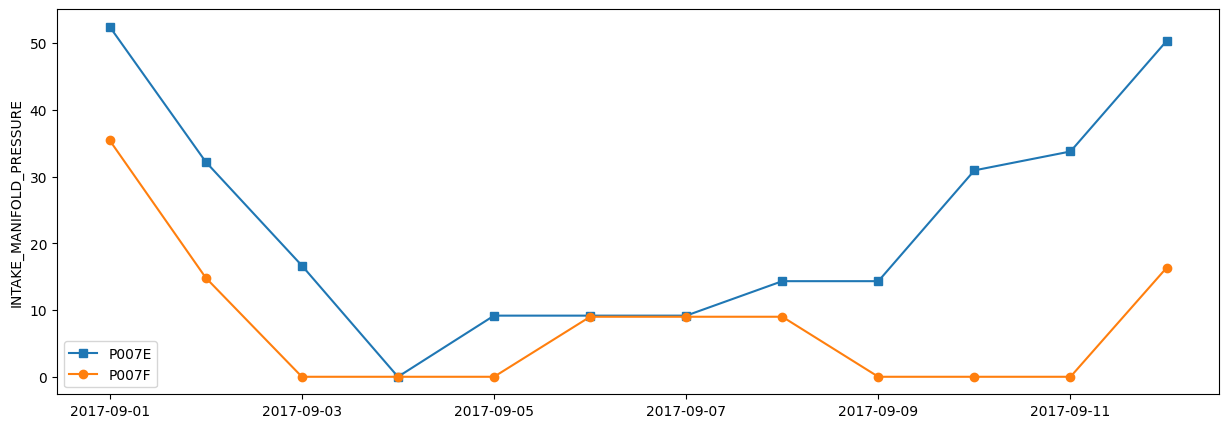

In [41]:
plt.figure(figsize = (15,5))
plt.plot(req_data_1['TIMESTAMP'],req_data_1['INTAKE_MANIFOLD_PRESSURE'].rolling(window=3).mean(), marker = "s", label = 'P007E')
plt.plot(req_data_2['TIMESTAMP'],req_data_2['INTAKE_MANIFOLD_PRESSURE'].rolling(window=3).mean(), marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('INTAKE_MANIFOLD_PRESSURE')
plt.show()

# after downsampling
# P007E - sensor value decreases until september 4 and then gradually increases
# P007F - sensor value decreases until september 4, but appears to follow a seasonal pattern afterwards.

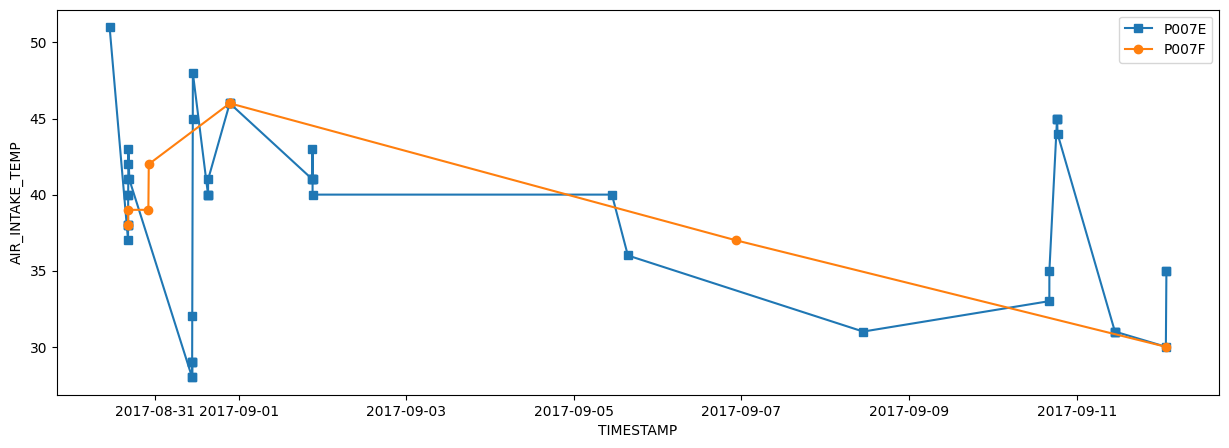

In [42]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['AIR_INTAKE_TEMP'], marker = "s", label = "P007E")
plt.plot(data2['TIMESTAMP'],data2['AIR_INTAKE_TEMP'], marker = "o", label = "P007F")
# plt.scatter(time3,workingset['AIR_INTAKE_TEMP'], c = 'g', marker = "x", label = "other data")
plt.legend(loc='best')
plt.xlabel('TIMESTAMP')
plt.ylabel('AIR_INTAKE_TEMP')
plt.show()

In [43]:
mdl5 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto',max_iter = 200).fit(np.array(X['AIR_INTAKE_TEMP']).reshape(-1,1) , y)
mdl5.score(np.array(X['AIR_INTAKE_TEMP']).reshape(-1,1),y)

0.34375

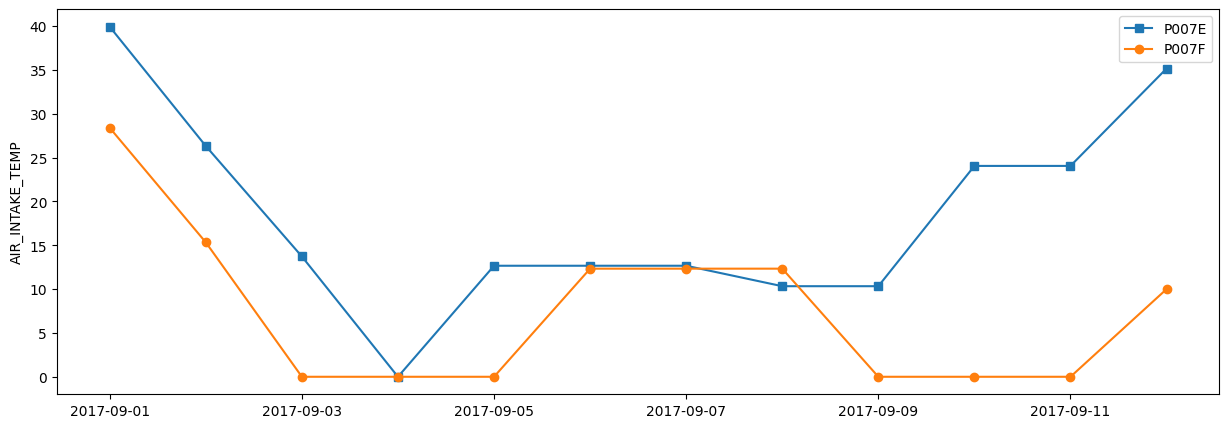

In [44]:
plt.figure(figsize = (15,5))
plt.plot(req_data_1['TIMESTAMP'],req_data_1['AIR_INTAKE_TEMP'].rolling(window=3).mean(), marker = "s", label = 'P007E')
plt.plot(req_data_2['TIMESTAMP'],req_data_2['AIR_INTAKE_TEMP'].rolling(window=3).mean(), marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('AIR_INTAKE_TEMP')
plt.show()
# after downsampling
# P007E - sensor value decreases until september 4, and is almost constant with a small dip in september 9th and then increases afterwards.
# P007F - sensor value decreases until september 4, but appears to follow a seasonal pattern afterwards.

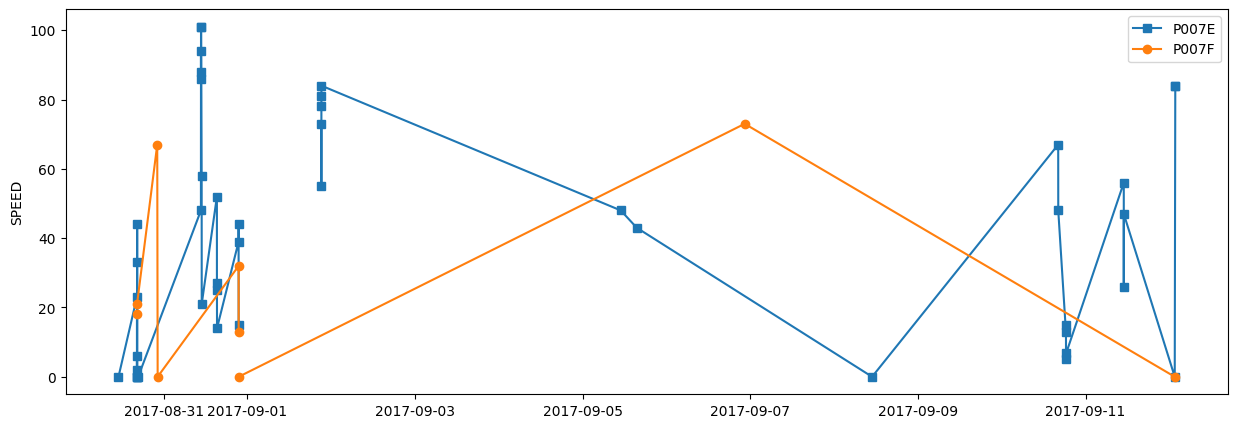

In [45]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['SPEED'], marker = "s", label = 'P007E')
plt.plot(data2['TIMESTAMP'],data2['SPEED'], marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('SPEED')
plt.show()

In [46]:
mdl6 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto',max_iter = 200).fit(np.array(X['SPEED']).reshape(-1,1) , y)
mdl6.score(np.array(X['SPEED']).reshape(-1,1),y)
# checking the accuracy of the classifier to decide on the relationship between sensor data and trouble code's
# accuracy score is low to set up a relationship

0.3125

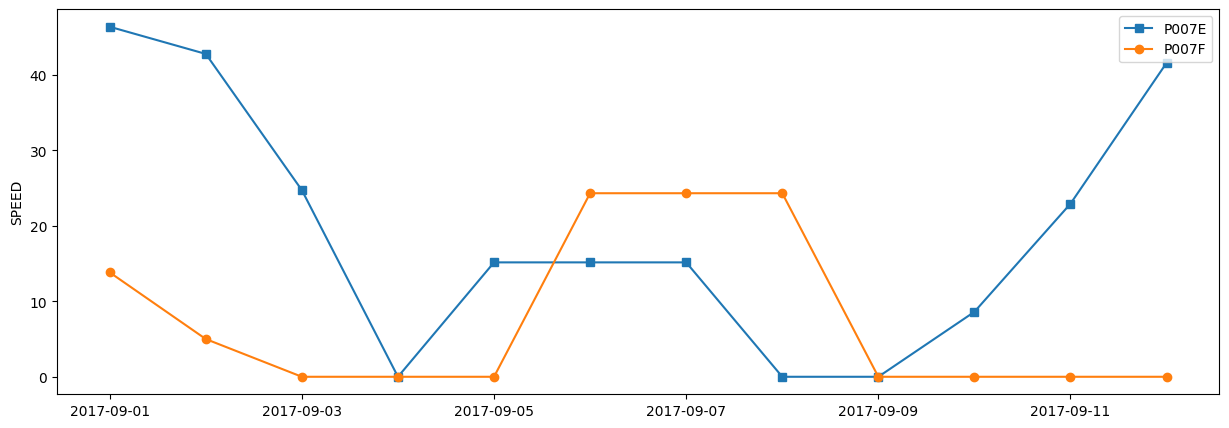

In [47]:
plt.figure(figsize = (15,5))
plt.plot(req_data_1['TIMESTAMP'],req_data_1['SPEED'].rolling(window=3).mean(), marker = "s", label = 'P007E')
plt.plot(req_data_2['TIMESTAMP'],req_data_2['SPEED'].rolling(window=3).mean(), marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('SPEED')
plt.show()
# after downsampling
# P007E - sensor value has a dip from sept 1st to sept 4th, and increases after september 9th.
# P007F - sensor value decreases to 0 until sept 5th, and follows a seasonal pattern afterwards.

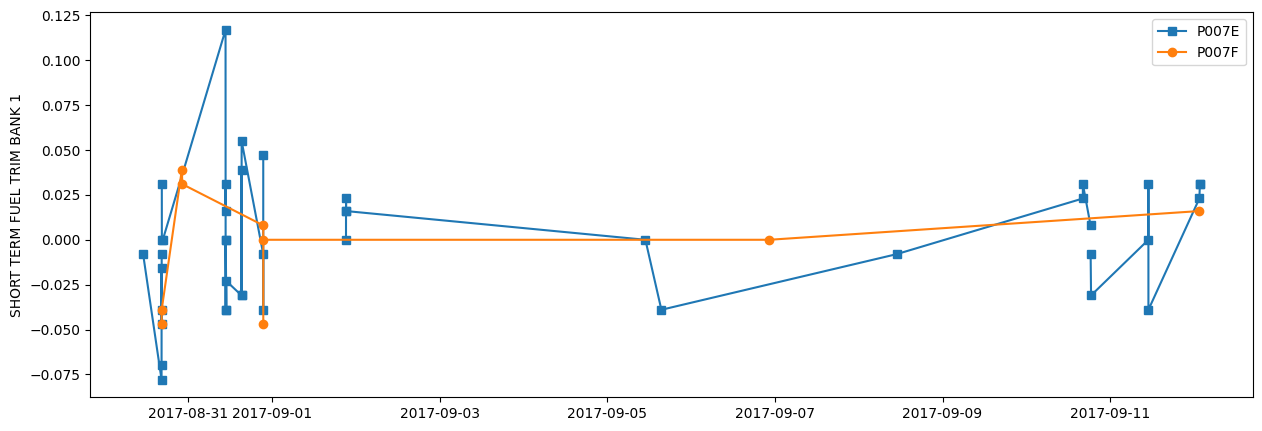

In [48]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['SHORT TERM FUEL TRIM BANK 1'], marker = "s", label = 'P007E')
plt.plot(data2['TIMESTAMP'],data2['SHORT TERM FUEL TRIM BANK 1'], marker = "o", label = 'P007F')
# plt.scatter(time3,workingset['SHORT TERM FUEL TRIM BANK 1'], c = 'g', marker = "x", label = "other data")
plt.legend(loc='best')
plt.ylabel('SHORT TERM FUEL TRIM BANK 1')
plt.show()

# Fuel Trim values for bank1 are in ideal operating ranges for both the codes.

In [49]:
mdl7 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto',max_iter = 200).fit(np.array(X['SHORT TERM FUEL TRIM BANK 1']).reshape(-1,1) , y)
mdl7.score(np.array(X['SHORT TERM FUEL TRIM BANK 1']).reshape(-1,1),y)

0.34375

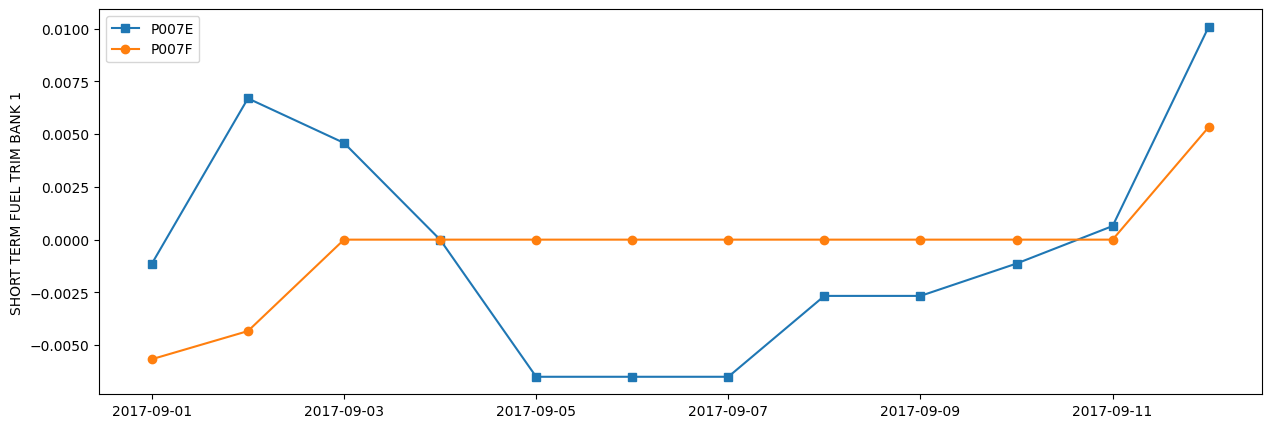

In [50]:
plt.figure(figsize = (15,5))
plt.plot(req_data_1['TIMESTAMP'],req_data_1['SHORT TERM FUEL TRIM BANK 1'].rolling(window=3).mean(), marker = "s", label = 'P007E')
plt.plot(req_data_2['TIMESTAMP'],req_data_2['SHORT TERM FUEL TRIM BANK 1'].rolling(window=3).mean(), marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('SHORT TERM FUEL TRIM BANK 1')
plt.show()
# after downsampling
# P007E - sensor value has a dip from sept 3rd to sept 5th, and increases after september 7th.
# P007F - sensor value increases until sept 3rd, and is constant until september 11th.

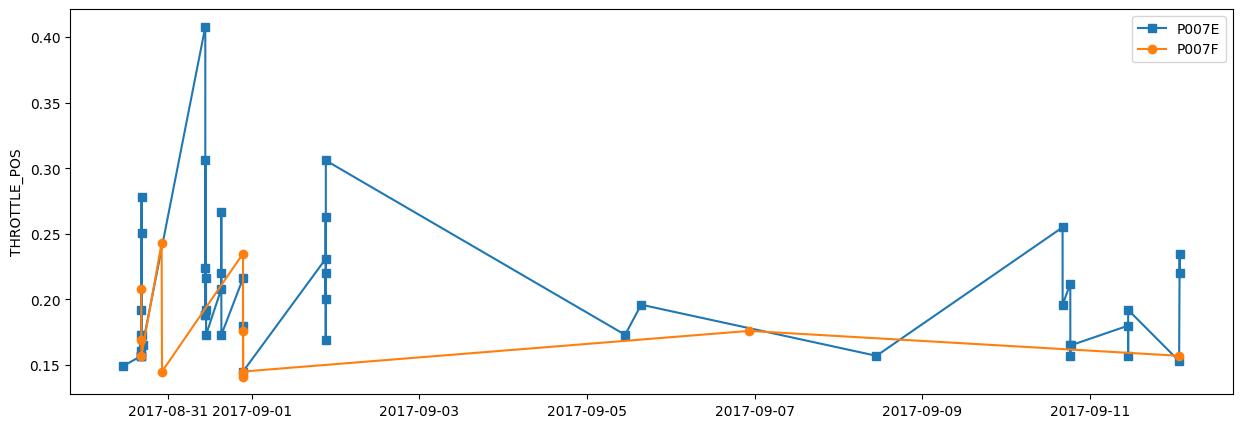

In [51]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['THROTTLE_POS'], marker = "s", label = 'P007E')
plt.plot(data2['TIMESTAMP'],data2['THROTTLE_POS'], marker = "o", label = 'P007F')
# plt.scatter(time3,workingset['THROTTLE_POS'], c = 'g', marker = "x", label = "other data")
plt.legend(loc='best')
plt.ylabel('THROTTLE_POS')
plt.show()

In [52]:
mdl8 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto',max_iter = 200).fit(np.array(X['THROTTLE_POS']).reshape(-1,1) , y)
mdl8.score(np.array(X['THROTTLE_POS']).reshape(-1,1),y)

0.34375

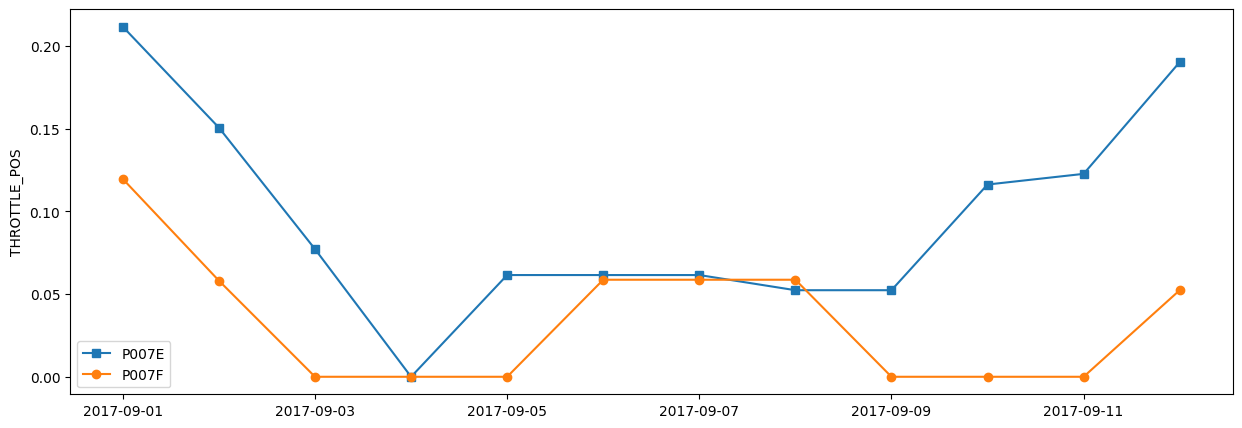

In [53]:
plt.figure(figsize = (15,5))
plt.plot(req_data_1['TIMESTAMP'],req_data_1['THROTTLE_POS'].rolling(window=3).mean(), marker = "s", label = 'P007E')
plt.plot(req_data_2['TIMESTAMP'],req_data_2['THROTTLE_POS'].rolling(window=3).mean(), marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('THROTTLE_POS')
plt.show()
# after downsampling - follows the exact trend of 'AIR_INTAKE_TEMP'
# P007E - sensor value decreases until september 4, and is almost constant with a small dip in september 9th and then increases afterwards.
# P007F - sensor value decreases until september 4, but appears to follow a seasonal pattern afterwards.

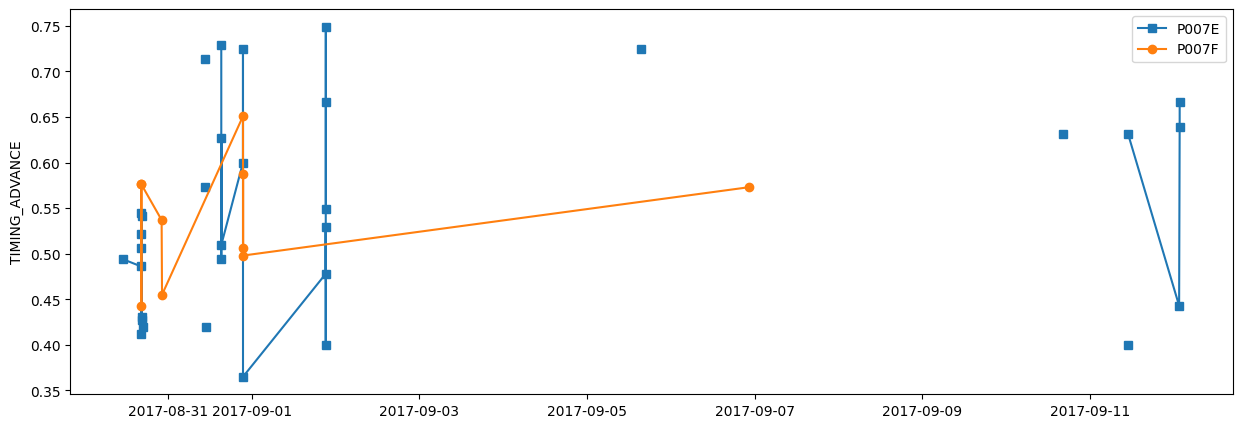

In [54]:
plt.figure(figsize = (15,5))
plt.plot(data1['TIMESTAMP'],data1['TIMING_ADVANCE'], marker = "s", label = 'P007E')
plt.plot(data2['TIMESTAMP'],data2['TIMING_ADVANCE'], marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('TIMING_ADVANCE')
plt.show()

#Timing advances varies widely, especially are higher for P007E codes compared to P007F codes.

In [55]:
mdl9 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto',max_iter = 200).fit(np.array(X['TIMING_ADVANCE']).reshape(-1,1) , y)
mdl9.score(np.array(X['TIMING_ADVANCE']).reshape(-1,1),y)

0.40625

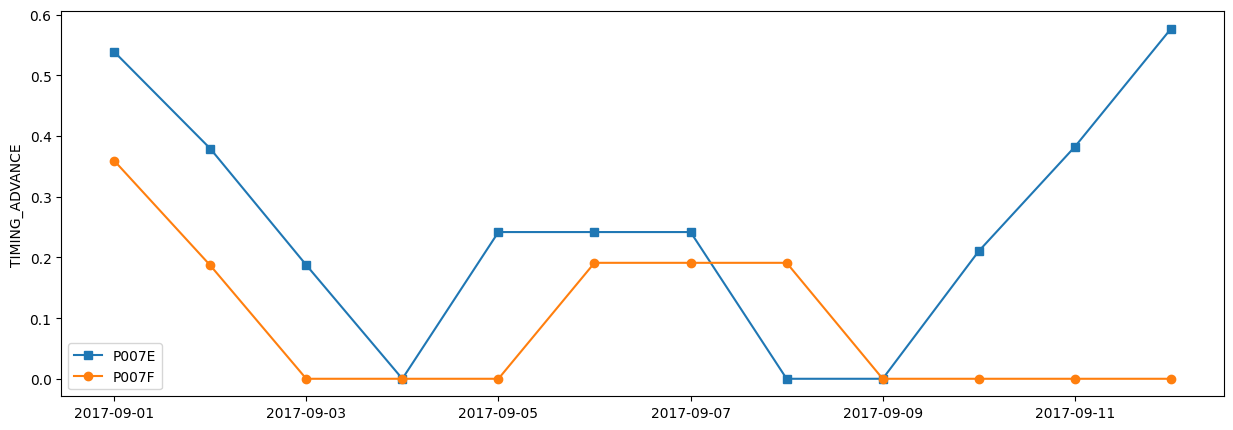

In [56]:
plt.figure(figsize = (15,5))
plt.plot(req_data_1['TIMESTAMP'],req_data_1['TIMING_ADVANCE'].rolling(window=3).mean(), marker = "s", label = 'P007E')
plt.plot(req_data_2['TIMESTAMP'],req_data_2['TIMING_ADVANCE'].rolling(window=3).mean(), marker = "o", label = 'P007F')
plt.legend(loc='best')
plt.ylabel('TIMING_ADVANCE')
plt.show()
# after downsampling - almost follows the trend of 'INTAKE_MANIFOLD_PRESSURE'
# P007E - sensor value decreases until september 4 and then gradually increases
# P007F - sensor value decreases until september 4, but appears to follow a seasonal pattern afterwards.

In [57]:
model1 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto',max_iter=100000).fit(X, y)
model1.score(X,y)
# when data is used without re-sampling, the accuracy of the classifier is low and requires more iterations to converge to a solution,
# and so, it is not feasible to establish a relationship between sensor data and P007E/F Trouble Codes.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.59375

In [59]:
model3 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto',max_iter = 200).fit(X_resampled , y_resampled)
model3.score(X_resampled, y_resampled)
# data when downsampled gives us more feasibility to establish relationship between sensor data and P007E/F Trouble Codes.

0.6785714285714286

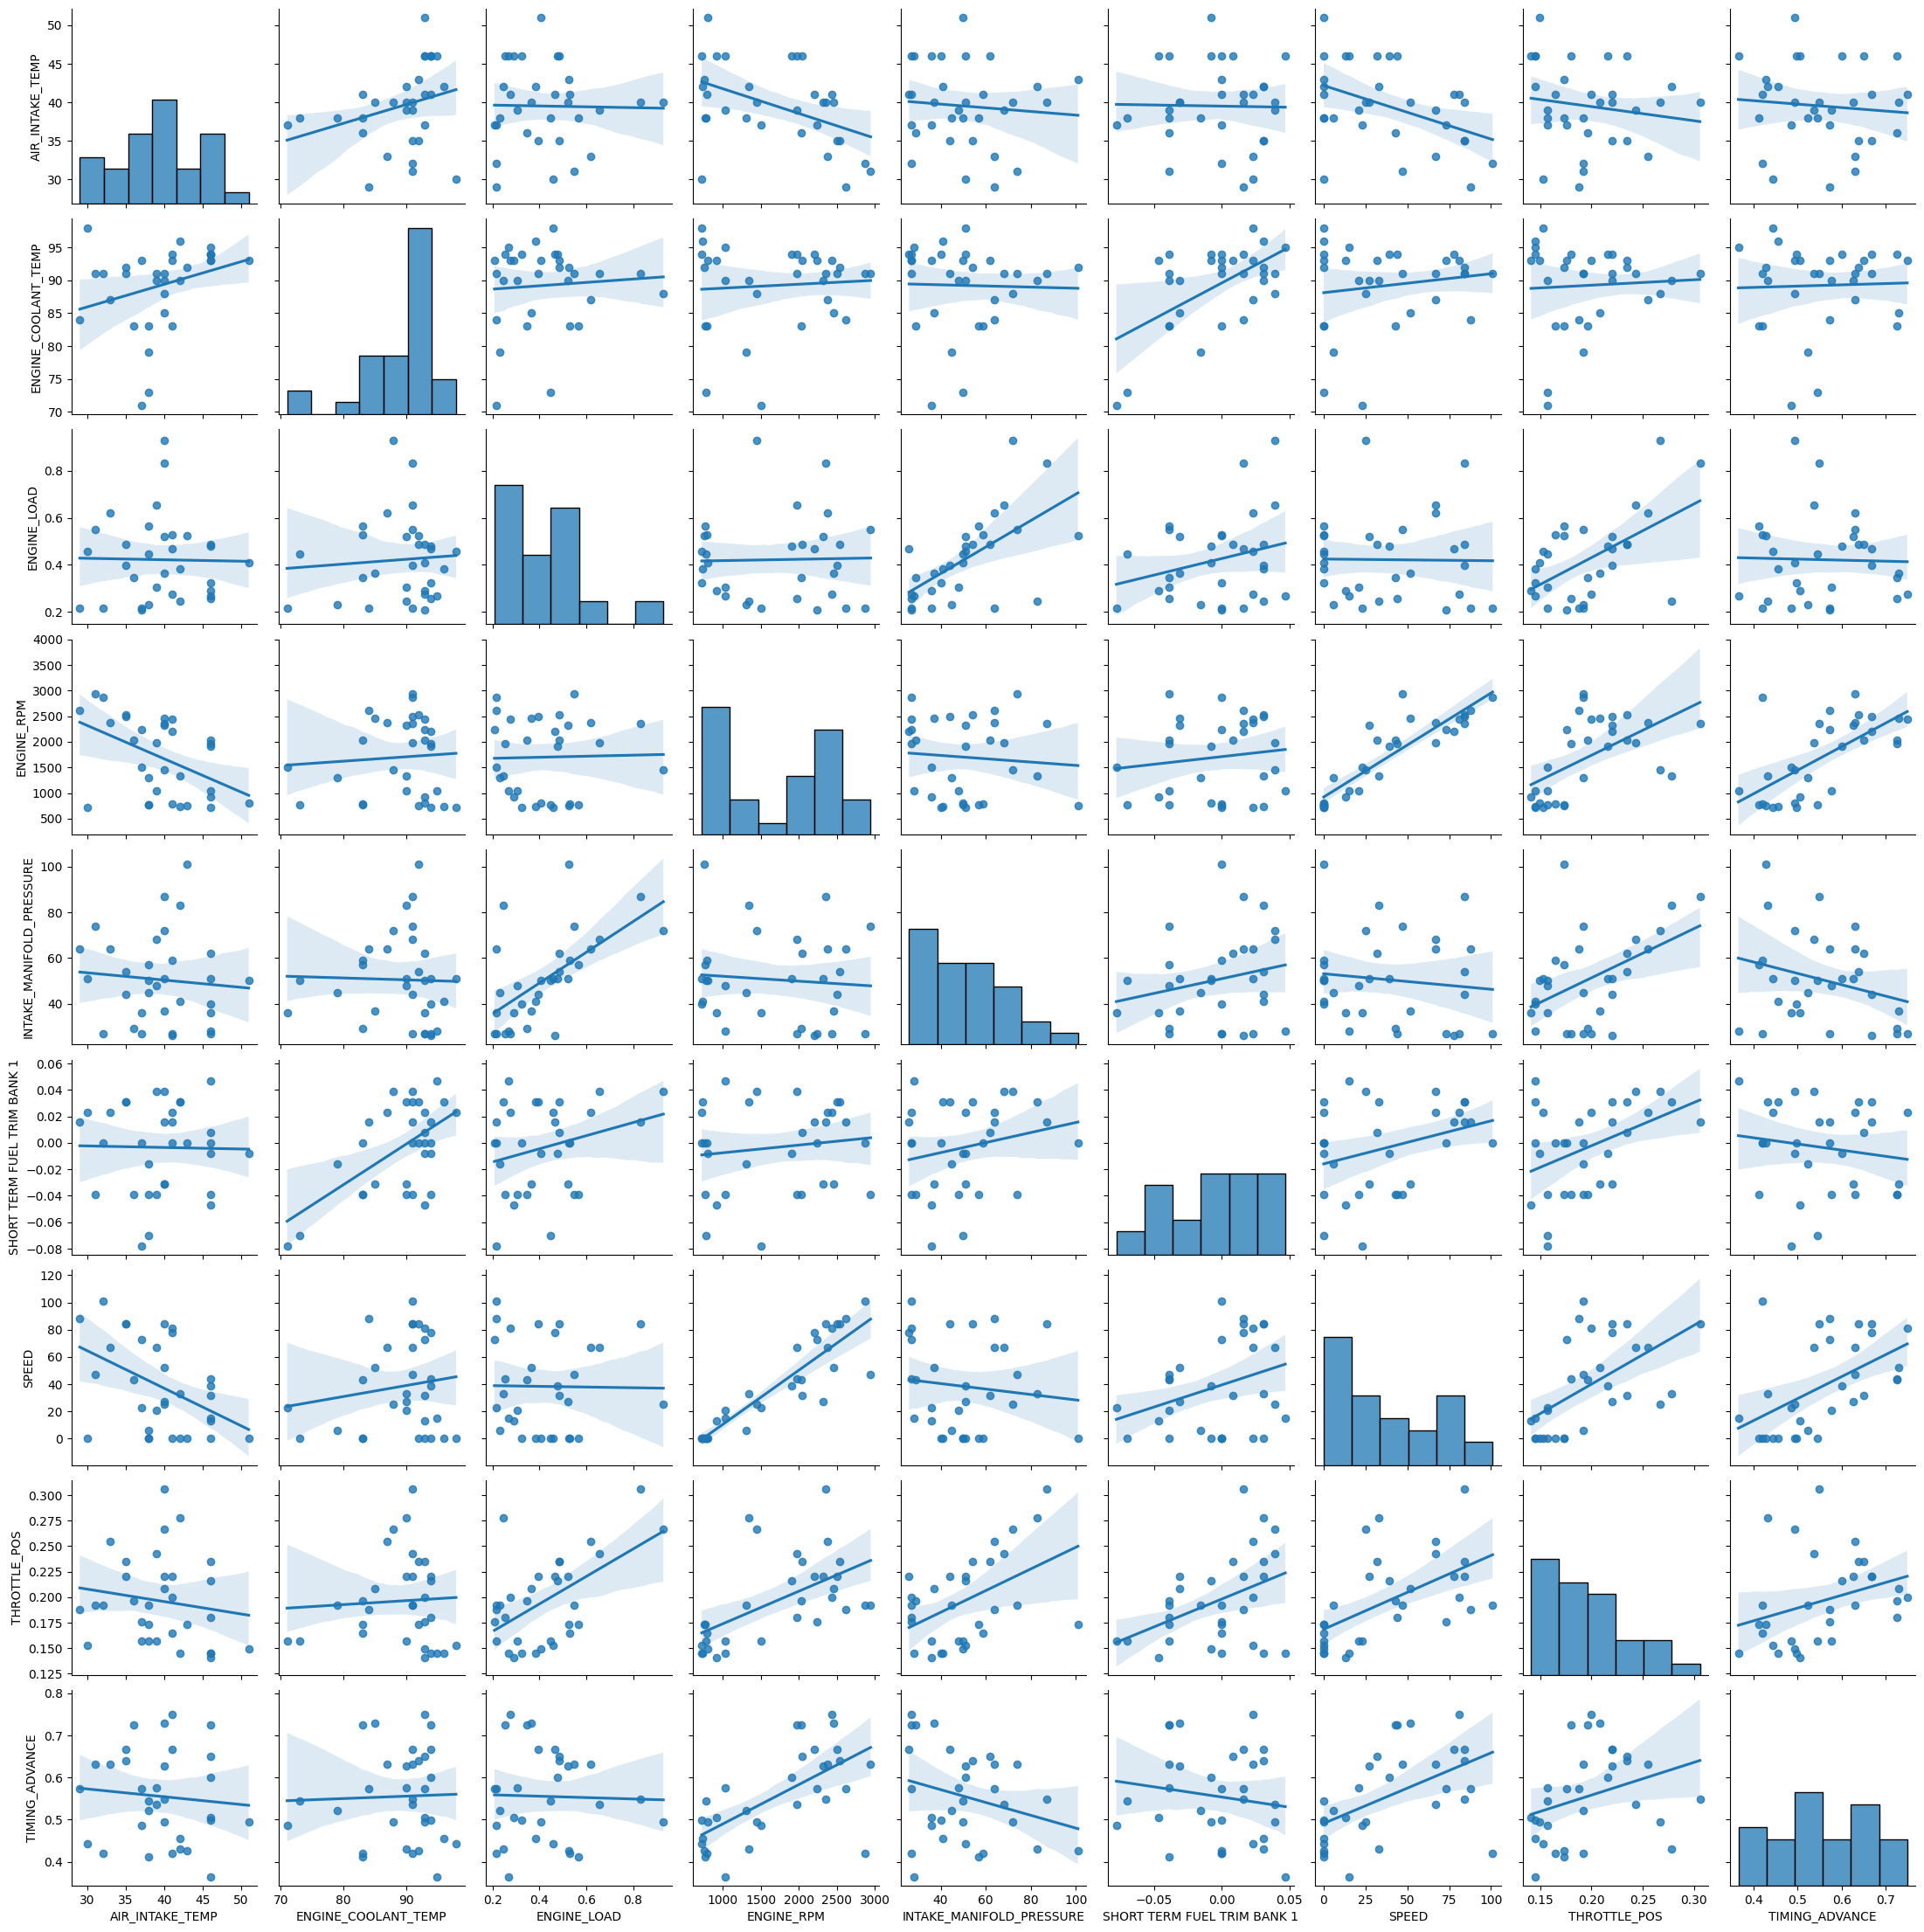

In [60]:
sns.pairplot(X,kind='reg')
# bivariate plots between sensor data before re-sampling

<Axes: >

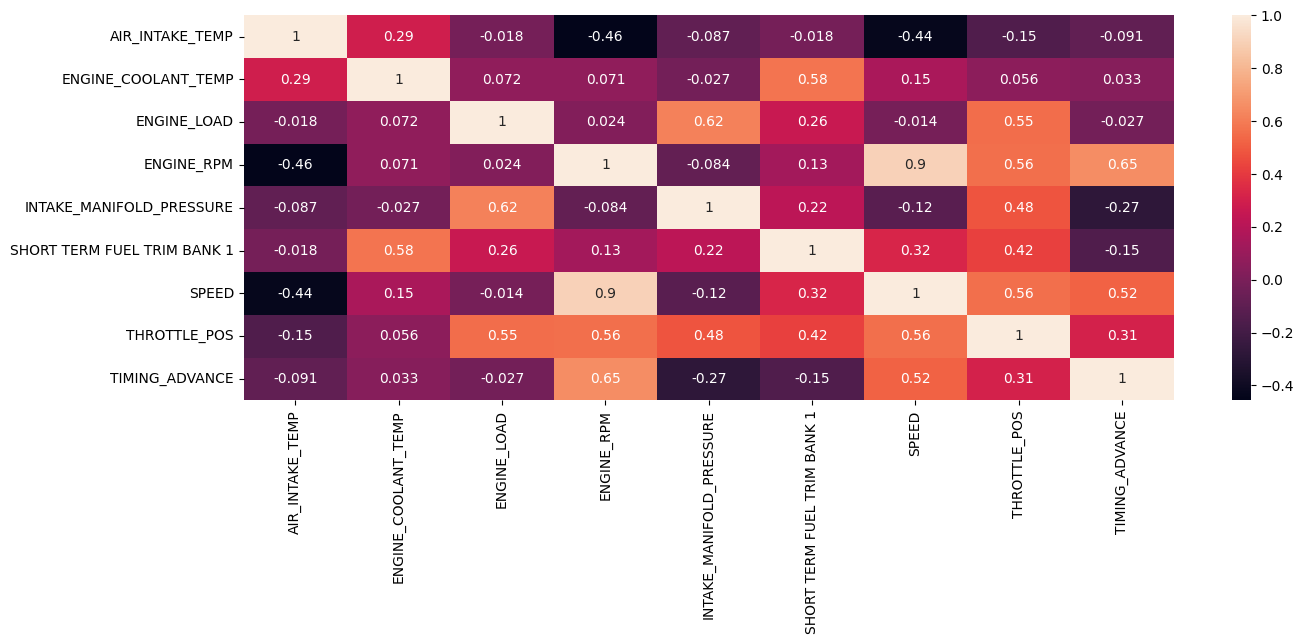

In [61]:
plt.figure(figsize = (15,5))
sns.heatmap(X.corr(),annot=True)

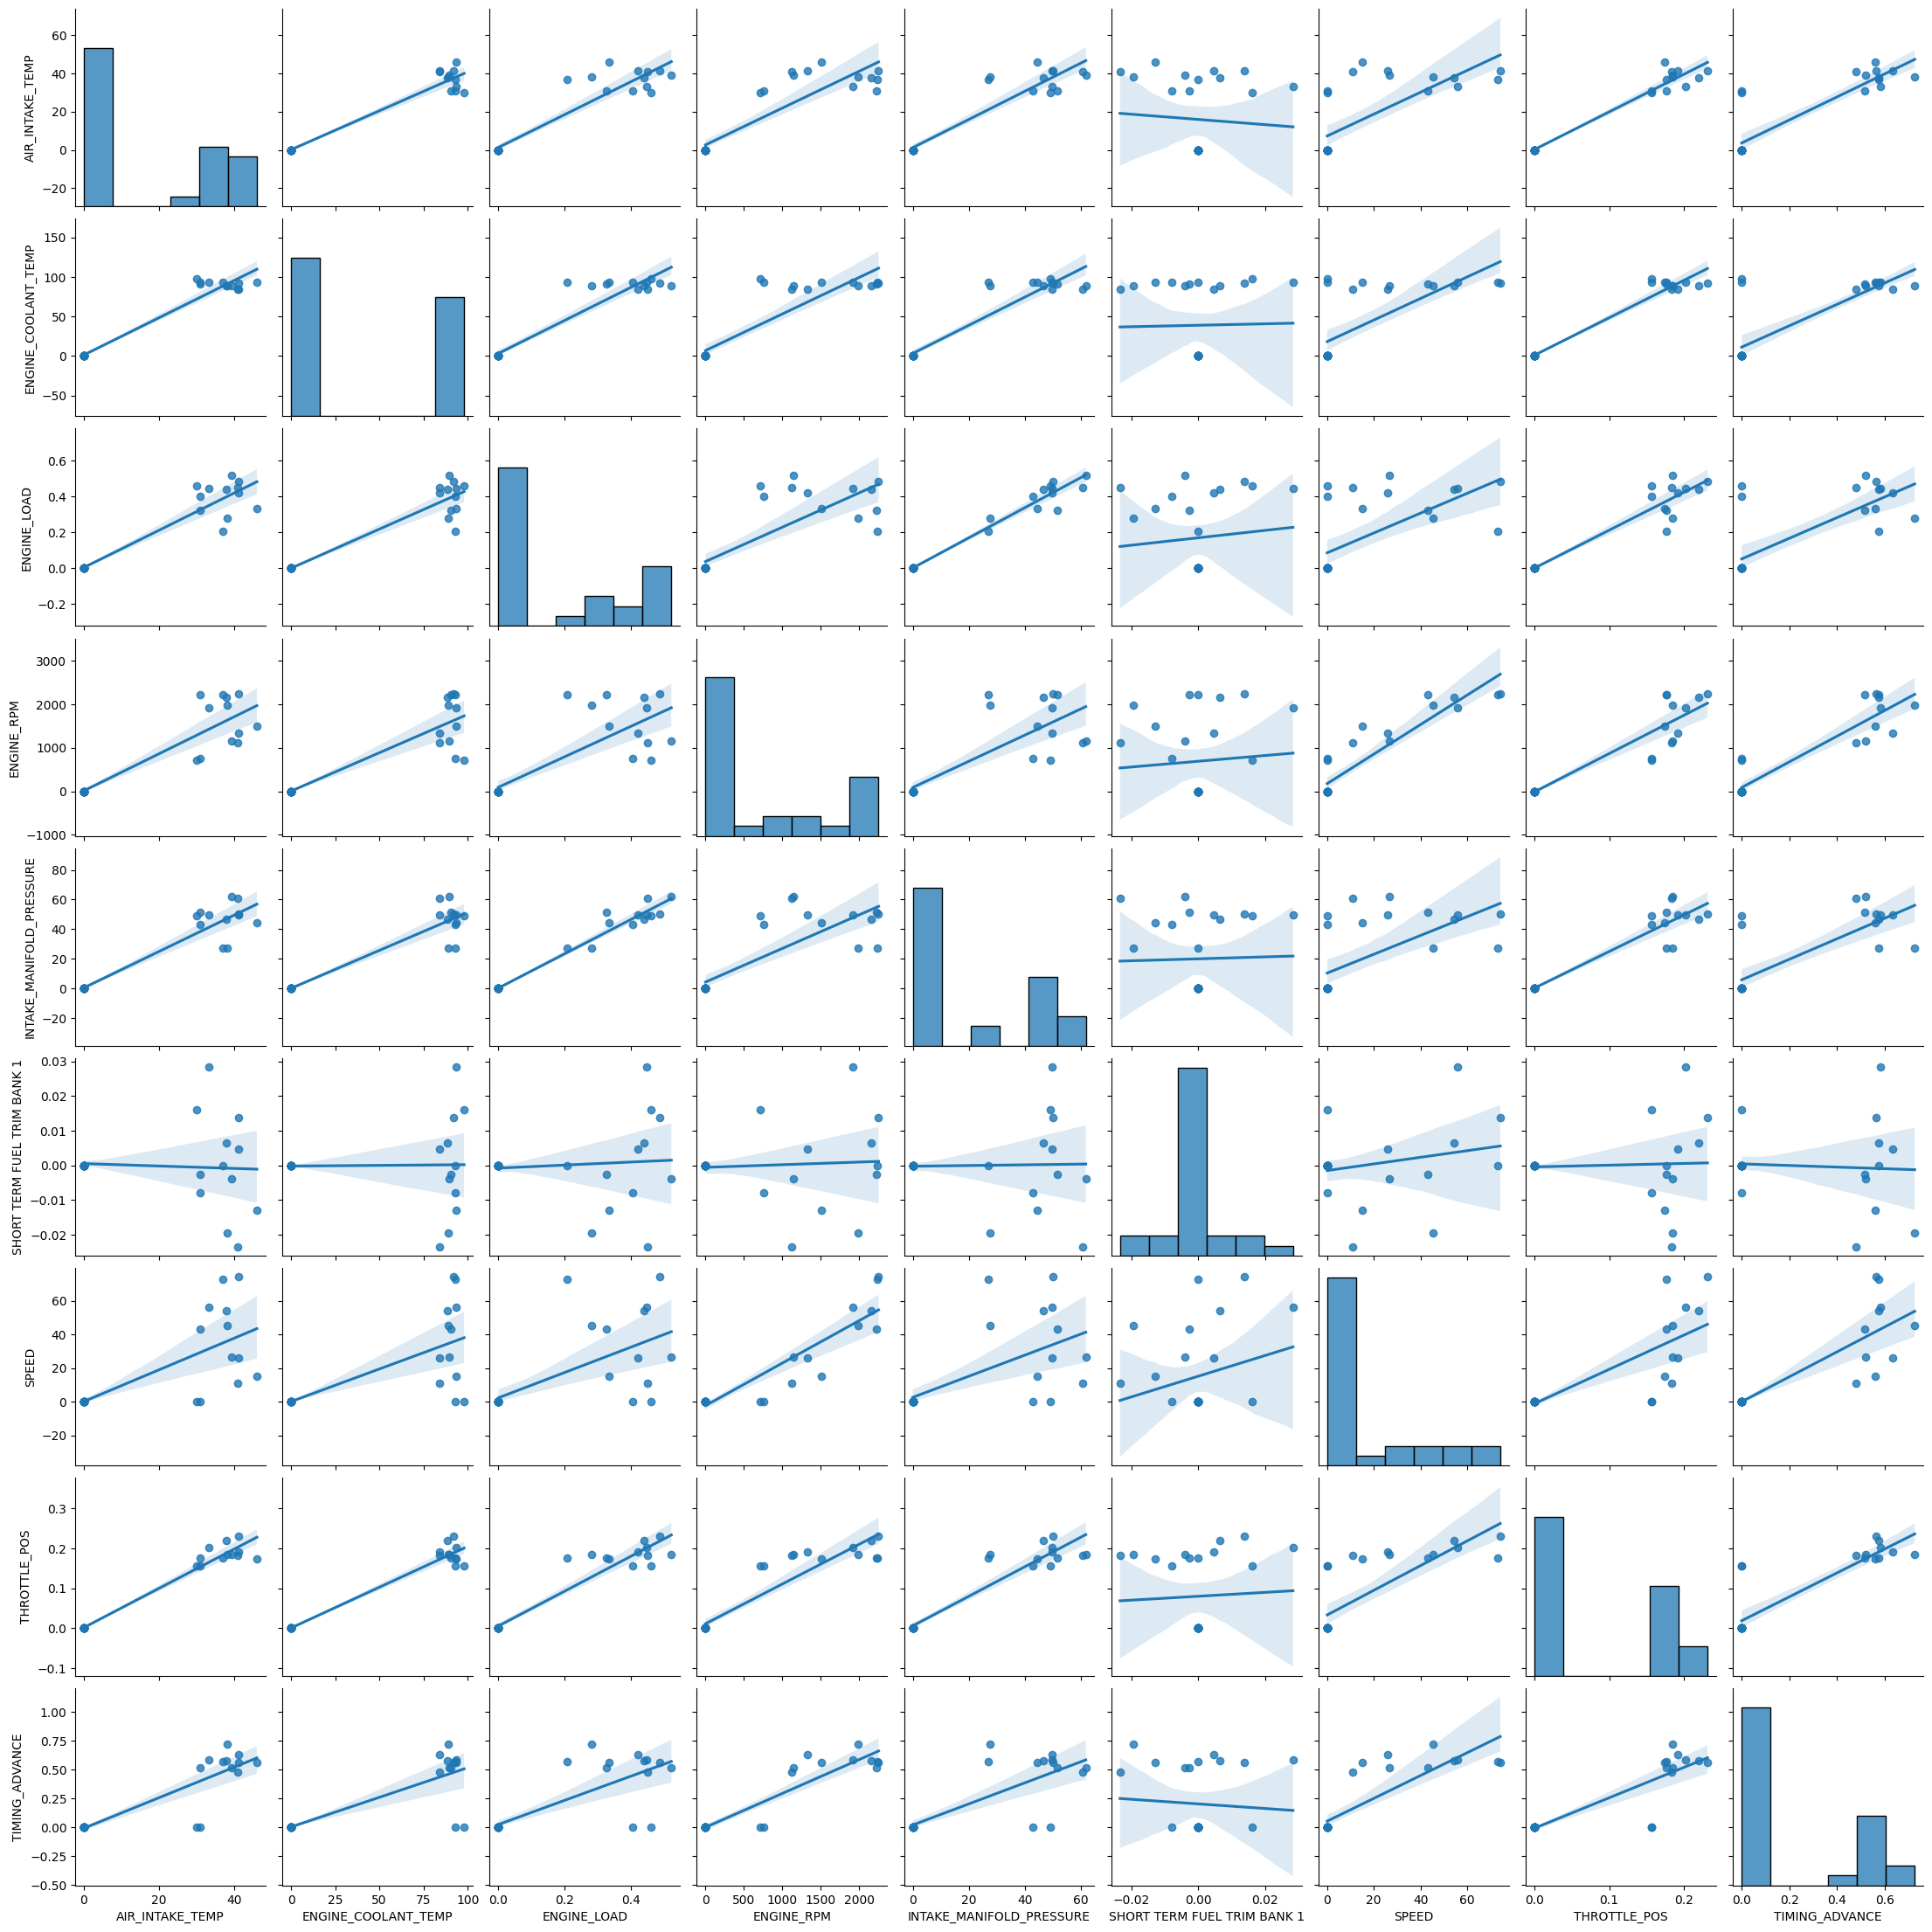

In [62]:
sns.pairplot(X_resampled,kind='reg')
# bi-variate plots between sensor data after downsampling

<Axes: >

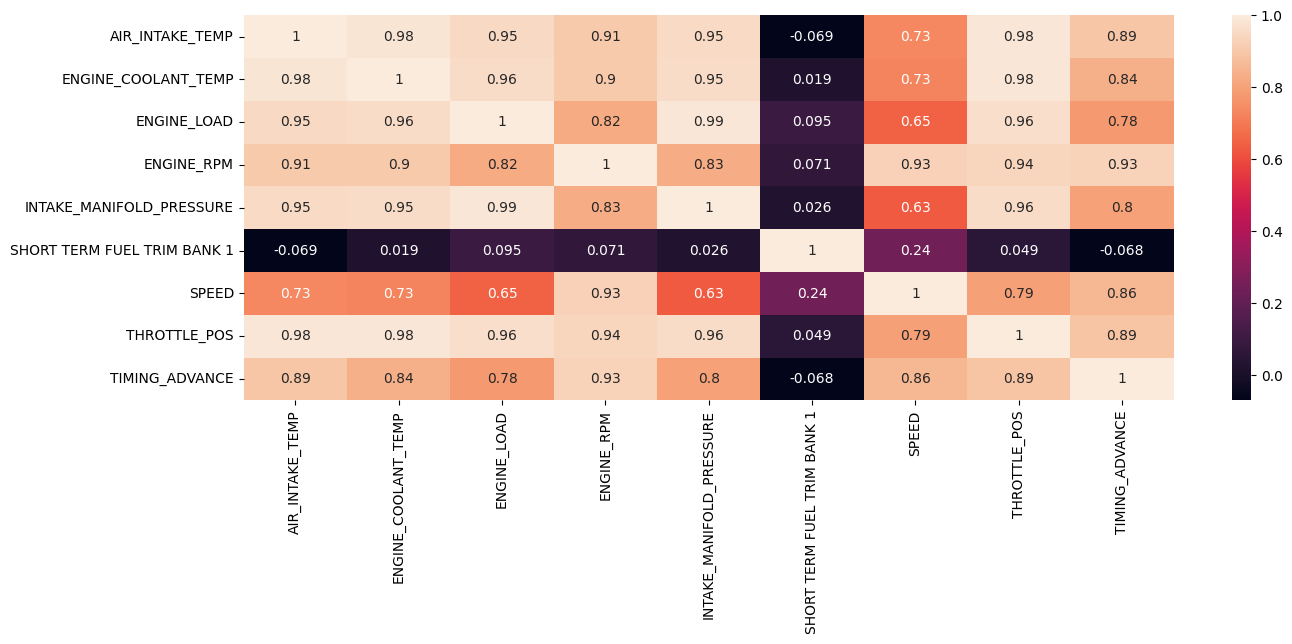

In [63]:
plt.figure(figsize = (15,5))
sns.heatmap(X_resampled.corr(),annot=True)

### Initial Findings from the Data Set
1. Sensor Data is not present for Short Term and Long Term Fuel Trim values for bank 2 , it implies that there is a problem with bank 2 of the engine while codes P007E & P007F are set.
2. There are sensor data’s for short term fuel trim values for bank 1, implies that bank 1 is able to get both fuel and air and also implies that our ECU is working.
3. From the correlation graph, the co-relations between Air Intake temperatures & Engine Coolant Temperature, short term fuel trim bank1 & engine load are varying with time, implies bank 1 is working fine.
4. Normally the charge air cooler temperature sensor values are compared with Intake Air Temperature Sensor values to improve the efficiency of the engine. But, as there are no sensor data’s for MAF(Mass Air Flow) sensor, BAP( Barometric Air Pressure) sensor and Ambient Temperature Sensor(ATC) , implies that there would be disturbances in the charge air cooler (as there are no ATC and MAF values) and air flow into the banks.
5. On the whole, we could say that there are disturbances in the air flow temperatures (both input and exhaust) in bank 2 of the engine which led to set the codes P007F and P2036. There are also disturbances in the charge air cooler temperature sensors which led to set the code P007E.

In [64]:
p=['DTC_NUMBER','AUTOMATIC']
data=data.drop(p, axis=1)

In [66]:
data.head()

,TIMESTAMP,MAKE,MODEL,CAR_YEAR,ENGINE_POWER,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,...,ENGINE_RUNTIME,THROTTLE_POS,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,2017-07-08 17:54:47.058,volkswagen,polo,2006.0,1.6,car6,NaN,42.0,NaN,0.063,...,NaN,0.043,P0133,0.714,NaN,53.0,18.0,5.0,7.0,2017.0
1,2017-07-08 17:54:59.071,volkswagen,polo,2006.0,1.6,car6,NaN,42.0,NaN,0.067,...,NaN,0.043,P0133,0.690,NaN,53.0,18.0,5.0,7.0,2017.0
2,2017-07-08 17:55:11.089,volkswagen,polo,2006.0,1.6,car6,NaN,43.0,NaN,0.075,...,NaN,0.043,P0133,0.506,NaN,53.0,18.0,5.0,7.0,2017.0
3,2017-07-08 17:55:23.101,volkswagen,polo,2006.0,1.6,car6,NaN,44.0,NaN,0.055,...,NaN,0.035,P0133,0.537,NaN,53.0,18.0,5.0,7.0,2017.0
4,2017-07-08 17:55:35.109,volkswagen,polo,2006.0,1.6,car6,NaN,45.0,NaN,0.051,...,NaN,0.031,P0133,0.541,NaN,53.0,18.0,5.0,7.0,2017.0


In [67]:
data.iloc[:,1:].describe().round(2)

,CAR_YEAR,ENGINE_POWER,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,...,SHORT TERM FUEL TRIM BANK 2,SHORT TERM FUEL TRIM BANK 1,THROTTLE_POS,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
count,11925.00,11925.00,0.0,11873.00,0.0,11089.00,0.0,11837.00,11868.00,0.0,...,0.0,5817.00,11862.00,11885.00,0.0,11925.00,11925.00,11925.00,11925.00,11925.0
mean,2010.39,1.60,NaN,74.08,NaN,0.35,NaN,1400.46,43.46,NaN,...,NaN,-0.01,0.11,0.59,NaN,24.64,10.17,2.50,8.12,2017.0
std,4.47,0.02,NaN,10.67,NaN,0.16,NaN,534.28,17.61,NaN,...,NaN,0.04,0.07,0.09,NaN,16.46,5.78,1.84,0.65,0.0
min,2006.00,1.40,NaN,22.00,NaN,0.05,NaN,465.00,16.00,NaN,...,NaN,-0.25,0.02,0.32,NaN,0.00,0.00,0.00,7.00,2017.0
25%,2006.00,1.60,NaN,72.00,NaN,0.24,NaN,815.00,31.00,NaN,...,NaN,-0.03,0.05,0.52,NaN,13.00,9.00,1.00,8.00,2017.0
50%,2006.00,1.60,NaN,77.00,NaN,0.38,NaN,1414.00,40.00,NaN,...,NaN,-0.01,0.12,0.56,NaN,26.00,11.00,3.00,8.00,2017.0
75%,2015.00,1.60,NaN,80.00,NaN,0.41,NaN,1808.00,54.00,NaN,...,NaN,0.02,0.14,0.67,NaN,40.00,12.00,4.00,9.00,2017.0
max,2015.00,1.60,NaN,99.00,NaN,1.00,NaN,3256.00,101.00,NaN,...,NaN,0.18,0.86,0.82,NaN,53.00,23.00,6.00,9.00,2017.0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11925 entries, 0 to 11924
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TIMESTAMP                    11925 non-null  datetime64[ns]
 1   MAKE                         11925 non-null  object        
 2   MODEL                        11925 non-null  object        
 3   CAR_YEAR                     11925 non-null  float64       
 4   ENGINE_POWER                 11925 non-null  float64       
 5   VEHICLE_ID                   11925 non-null  object        
 6   BAROMETRIC_PRESSURE(KPA)     0 non-null      float64       
 7   ENGINE_COOLANT_TEMP          11873 non-null  float64       
 8   FUEL_LEVEL                   0 non-null      float64       
 9   ENGINE_LOAD                  11089 non-null  float64       
 10  AMBIENT_AIR_TEMP             0 non-null      float64       
 11  ENGINE_RPM                   11837 non-nu

In [69]:
mean_value = data['SHORT TERM FUEL TRIM BANK 1'].mean()

In [70]:
data['SHORT TERM FUEL TRIM BANK 1'].fillna(mean_value, inplace=True)

<ipython-input-71-2a7b80d1f7ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.iloc[:,1:].corr(),annot=True)


<Axes: >

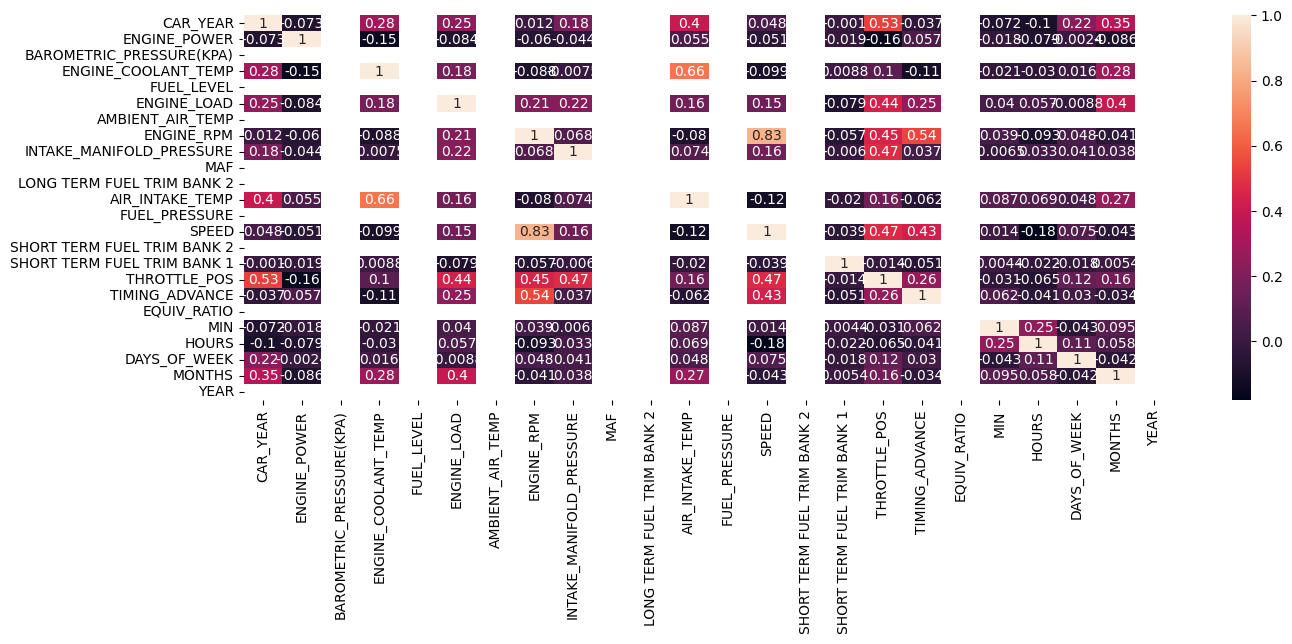

In [71]:
plt.figure(figsize = (15,5))
sns.heatmap(data.iloc[:,1:].corr(),annot=True)

In [72]:
data['TROUBLE_CODES'].unique()

array(['P0133', 'C0300', 'P0079P2004P3000', 'P0078U1004P3000',
       'P0079C1004P3000', 'P007EP2036P18F0', 'P007EP2036P18D0',
       'P007FP2036P18D0', 'P0079P1004P3000', 'P007EP2036P18E0',
       'P007FP2036P18E0', 'P0078B0004P3000', 'P007FP2036P18F0'],
      dtype=object)

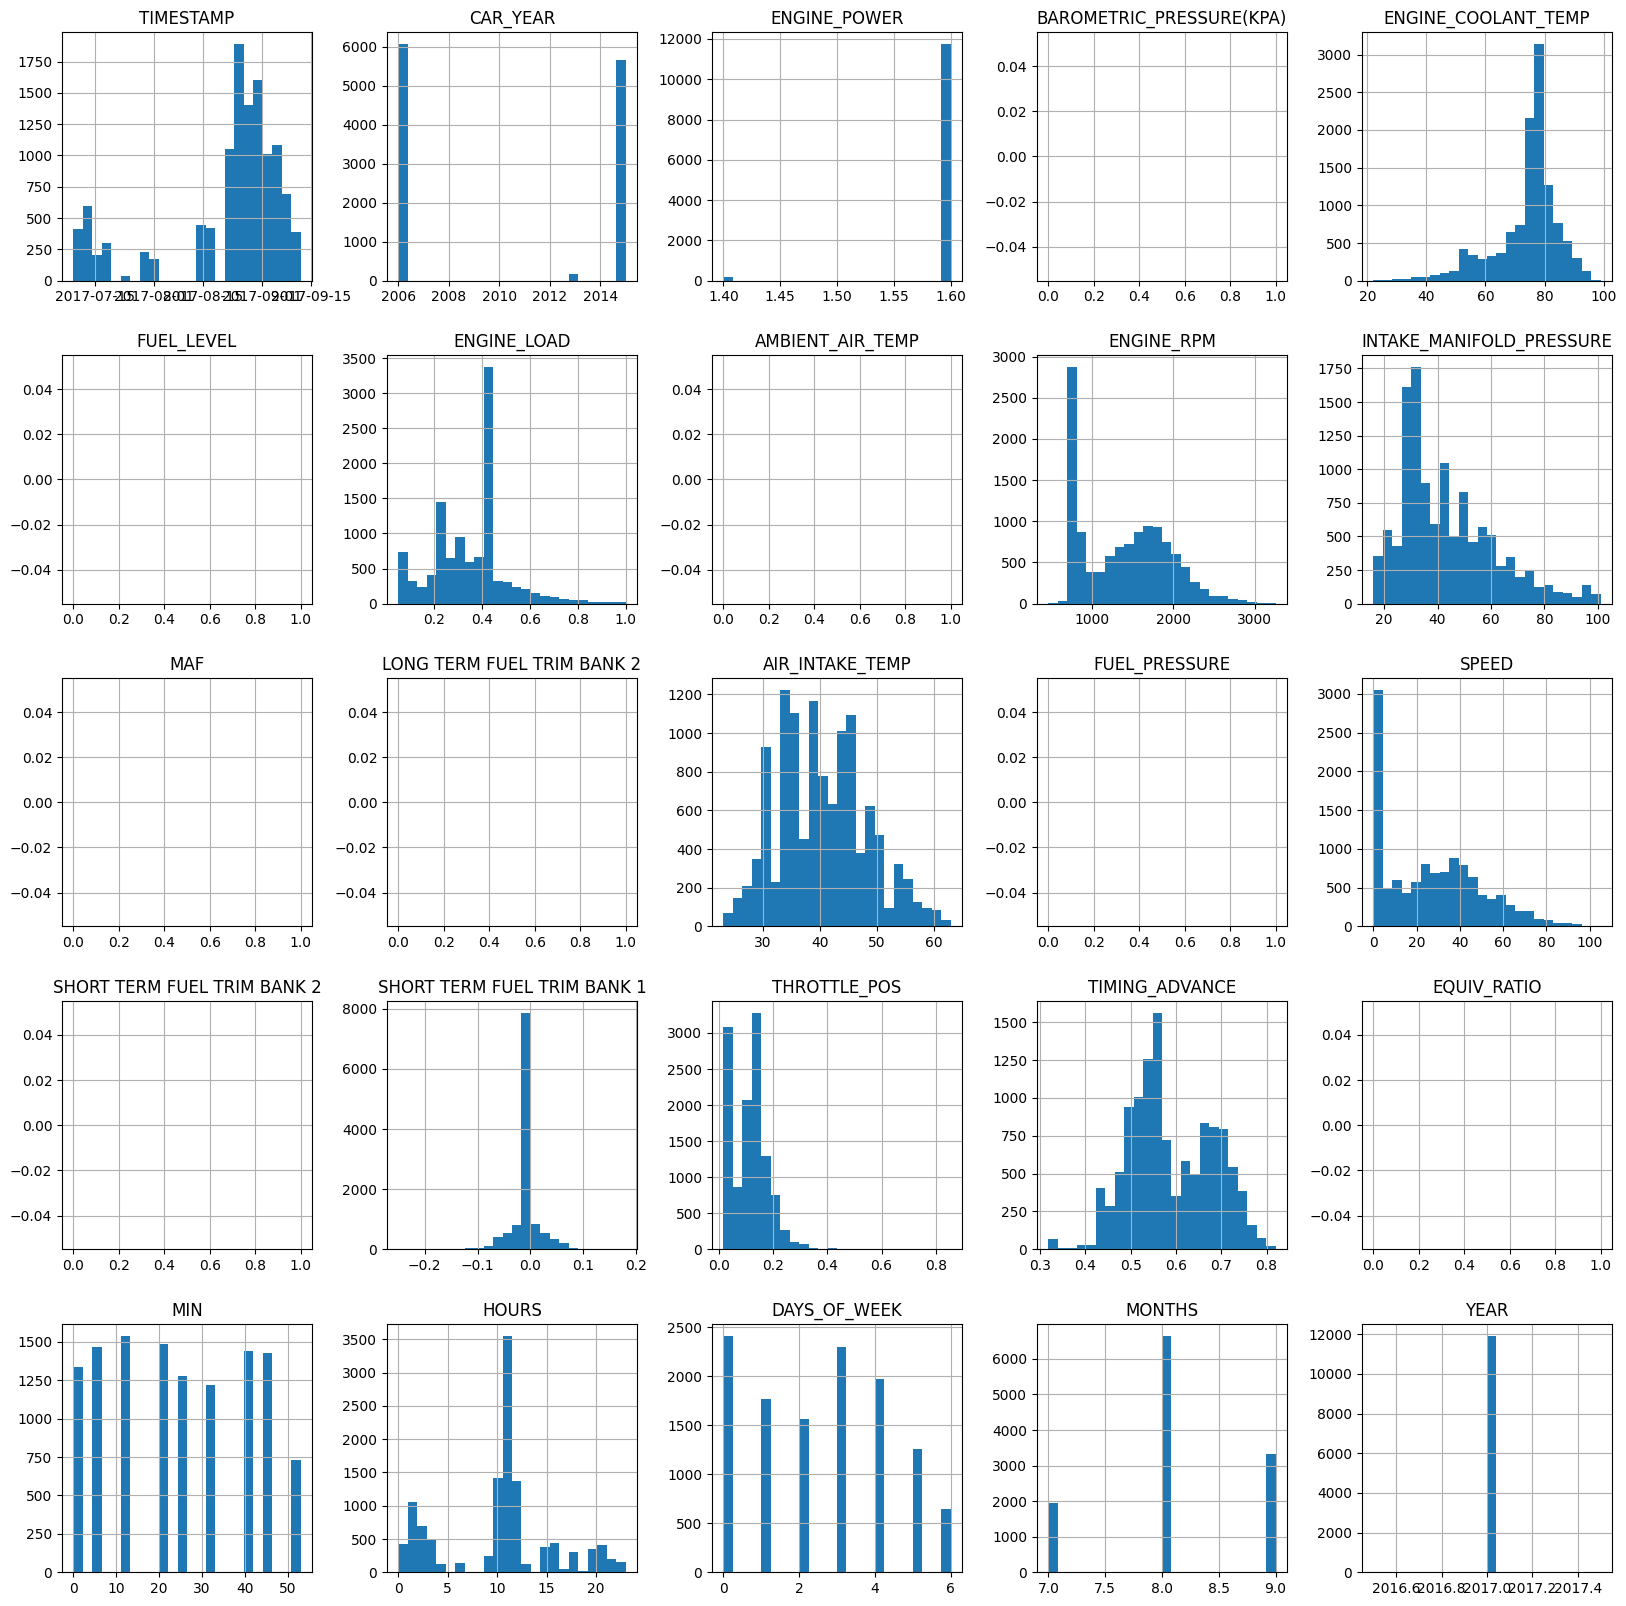

In [73]:
hist = data.hist(bins=24, figsize=(20,20) )

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import xgboost as xgb

In [75]:
data['TROUBLE_CODES'].unique()

array(['P0133', 'C0300', 'P0079P2004P3000', 'P0078U1004P3000',
       'P0079C1004P3000', 'P007EP2036P18F0', 'P007EP2036P18D0',
       'P007FP2036P18D0', 'P0079P1004P3000', 'P007EP2036P18E0',
       'P007FP2036P18E0', 'P0078B0004P3000', 'P007FP2036P18F0'],
      dtype=object)

In [76]:
# Define the label mapping dictionary
label_mapping = {
    'P0133': 0,
    'C0300': 1,
    'P0079P2004P3000': 2,
    'P0078U1004P3000': 3,
    'P0079C1004P3000': 4,
    'P007EP2036P18F0':5,
    'P007EP2036P18D0':6,
    'P007FP2036P18D0':7,
    'P0079P1004P3000':8,
    'P007EP2036P18E0':9,
    'P007FP2036P18E0':10,
    'P0078B0004P3000':11,
    'P007FP2036P18F0':12
}

# Label the column using the label mapping
data['TROUBLE_CODES'] = data['TROUBLE_CODES'].map(label_mapping)

# Print the updated DataFrame
print(data)

                    TIMESTAMP        MAKE MODEL  CAR_YEAR  ENGINE_POWER  \
0     2017-07-08 17:54:47.058  volkswagen  polo    2006.0           1.6   
1     2017-07-08 17:54:59.071  volkswagen  polo    2006.0           1.6   
2     2017-07-08 17:55:11.089  volkswagen  polo    2006.0           1.6   
3     2017-07-08 17:55:23.101  volkswagen  polo    2006.0           1.6   
4     2017-07-08 17:55:35.109  volkswagen  polo    2006.0           1.6   
...                       ...         ...   ...       ...           ...   
11920 2017-09-12 01:41:43.293     citroen    c3    2013.0           1.4   
11921 2017-09-12 01:42:15.372     citroen    c3    2013.0           1.4   
11922 2017-09-12 01:42:31.395     citroen    c3    2013.0           1.4   
11923 2017-09-12 01:42:39.412     citroen    c3    2013.0           1.4   
11924 2017-09-12 01:42:55.445     citroen    c3    2013.0           1.4   

      VEHICLE_ID  BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP  FUEL_LEVEL  \
0           car6    

In [93]:
# drop the timestamp field
a=["FUEL_TYPE"]
data=data.drop(a,axis=1)

In [98]:
X = data.drop(["TROUBLE_CODES"], axis =1)
y = data['TROUBLE_CODES']

In [99]:
X.fillna(0, inplace=True)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
classifier = SVC(kernel='linear', random_state=1)
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
cm = confusion_matrix(y_test, y_pred)
accuracy = float(cm.diagonal().sum()) / len(y_test)
print("Accuracy of SVM for the given dataset:", accuracy)

Accuracy of SVM for the given dataset: 0.9893795416433762


In [102]:
prediction2 = classifier.predict(X_test)
print(prediction2)

[1 0 1 ... 1 0 1]


In [103]:
cross_checking2 = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction2})
cross_checking2.sample(10)

,Actual,Predicted
11781,11,6
1402,0,0
5007,0,0
9212,1,1
7966,1,1
3079,0,0
10172,1,1
10422,1,1
5399,0,0
7914,1,1


In [104]:
cross_checking2.sample(10)

,Actual,Predicted
8585,1,1
2534,0,0
7109,1,1
6802,1,1
7585,1,1
9284,1,1
8501,1,1
6595,1,1
2894,0,0
3595,0,0


In [105]:
cross_checking2["Predicted"].unique()

array([ 1,  0,  2,  9,  4, 10,  8,  7,  3,  5,  6])

In [106]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [107]:
# 2. Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

In [108]:
# 3. Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [109]:
# 5. K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [110]:
# 4. Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=1)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

In [111]:
# 6. Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)

In [112]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("---------------------------")


evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_naive_bayes, "Naive Bayes")

Results for Decision Tree:
Accuracy: 0.9885
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1846
           1       1.00      1.00      1.00      1678
           2       0.38      0.23      0.29        13
           3       0.67      0.40      0.50        10
           4       0.08      0.14      0.11         7
           5       0.20      0.50      0.29         2
           6       0.20      0.33      0.25         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.33      0.25      0.29         8
          10       0.00      0.00      0.00         1
          11       0.33      0.17      0.22         6
          12       0.00      0.00      0.00         1

    accuracy                           0.99      3578
   macro avg       0.32      0.31      0.30      3578
weighted avg       0.99      0.99      0.99      3578

------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif